<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/13week_%EC%98%88%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 보팅

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN, random forest
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
rf_cf = RandomForestClassifier(random_state = 0)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn)], voting='soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 랜덤포레스트

In [4]:
from sklearn import datasets, tree 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [5]:
np.random.seed(5)

In [6]:
mnist = datasets.load_digits() 
features, labels = mnist.data, mnist.target


In [7]:
def cross_validation(classifier, features, labels): 
    cv_scores = [] 
    
    for i in range(10): 
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy') 
        cv_scores.append(scores.mean()) 
    return cv_scores



In [8]:
np.random.seed(5)
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels) #의사결정 트리의 정확도
dt_cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [9]:
np.mean(dt_cv_scores)

0.8241843575418993

In [10]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels) #랜덤 포레스트의 정확도
rf_cv_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [11]:
np.mean(rf_cv_scores)

0.9494096834264433

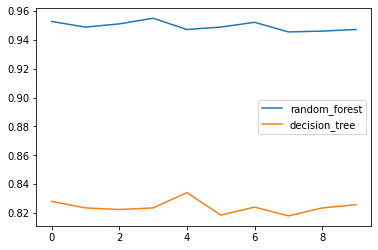

In [12]:
cv_list = [ ['random_forest', rf_cv_scores], ['decision_tree', dt_cv_scores] ] 
df = pd.DataFrame.from_dict(dict(cv_list)) 
df.plot()



## random forest 실습

In [13]:
feature_name_df = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_names'])

In [14]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [19]:
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/비타민/13주_앙상블/human activity data/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [20]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [21]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [50],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20]
          }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf,
                       param_grid = params,
                       cv = 2, 
                       n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.9173


In [22]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, 
                                max_depth = 12,
                                min_samples_leaf = 12,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9213


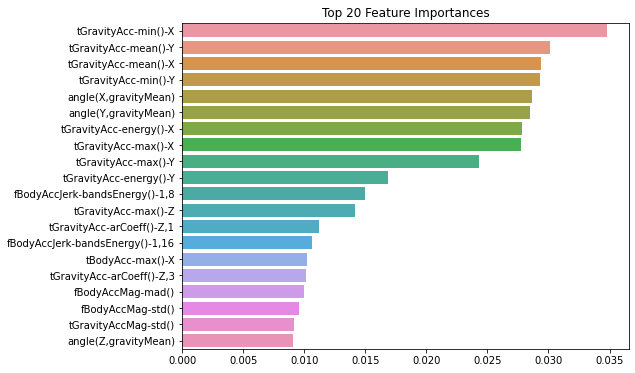

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 부스팅

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/hmkim312/datas/main/HAR/features.txt'

feature_name_df = pd.read_csv(url, sep = '\s+', header = None, names = ['column_index','column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()
X_train = pd.read_csv('https://raw.githubusercontent.com/hmkim312/datas/main/HAR/X_train.txt', sep = '\s+',  header = None)
X_test = pd.read_csv('https://raw.githubusercontent.com/hmkim312/datas/main/HAR/X_test.txt', sep = '\s+',  header = None)
y_train = pd.read_csv('https://raw.githubusercontent.com/hmkim312/datas/main/HAR/y_train.txt', sep = '\s+',  header = None, names = ['action'])
y_test = pd.read_csv('https://raw.githubusercontent.com/hmkim312/datas/main/HAR/y_test.txt', sep = '\s+',  header = None, names = ['action'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')

start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('ACC : ', accuracy_score(y_test, gb_pred))
print('Fit time : ', time.time() - start_time)

In [34]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=100 , learning_rate= 0.1, max_depth=3)
xgb.fit(X_train.values, y_train)
print('Fit time : ', time.time()-start_time)
print('Acc : ',accuracy_score(y_test,xgb.predict(X_test.values)))

Fit time :  100.7668867111206
Acc :  0.9395995928062436


In [35]:
from xgboost import XGBClassifier

evals = [(X_test.values, y_test)]

start_time = time.time()
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)
xgb.fit(X_train.values, y_train, early_stopping_rounds = 5, eval_set=evals)
print('Fit time : ', time.time() - start_time)
print('Acc : ',accuracy_score(y_test,xgb.predict(X_test.values)))

[0]	validation_0-merror:0.179165
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.162878
[2]	validation_0-merror:0.151001
[3]	validation_0-merror:0.143875
[4]	validation_0-merror:0.142518
[5]	validation_0-merror:0.133356
[6]	validation_0-merror:0.125212
[7]	validation_0-merror:0.124533
[8]	validation_0-merror:0.119783
[9]	validation_0-merror:0.117068
[10]	validation_0-merror:0.1113
[11]	validation_0-merror:0.108924
[12]	validation_0-merror:0.109603
[13]	validation_0-merror:0.106549
[14]	validation_0-merror:0.104852
[15]	validation_0-merror:0.102477
[16]	validation_0-merror:0.10078
[17]	validation_0-merror:0.097727
[18]	validation_0-merror:0.098405
[19]	validation_0-merror:0.096369
[20]	validation_0-merror:0.095691
[21]	validation_0-merror:0.09603
[22]	validation_0-merror:0.096369
[23]	validation_0-merror:0.096709
[24]	validation_0-merror:0.093994
[25]	validation_0-merror:0.092637
[26]	validation_0-merror:0.091958
[27]	validation_0-merror:0.092

In [36]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm = LGBMClassifier(n_estimator=100)
lgbm.fit(X_train.values, y_train, early_stopping_rounds=10, eval_set=evals)
print('Fit time : ', time.time() - start_time)
print('Acc : ',accuracy_score(y_test, grid.best_estimator_.predict(X_test.values)))


[1]	valid_0's multi_logloss: 1.57457
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.40575
[3]	valid_0's multi_logloss: 1.27229
[4]	valid_0's multi_logloss: 1.15846
[5]	valid_0's multi_logloss: 1.06183
[6]	valid_0's multi_logloss: 0.976362
[7]	valid_0's multi_logloss: 0.904415
[8]	valid_0's multi_logloss: 0.840532
[9]	valid_0's multi_logloss: 0.785064
[10]	valid_0's multi_logloss: 0.734836
[11]	valid_0's multi_logloss: 0.689421
[12]	valid_0's multi_logloss: 0.648672
[13]	valid_0's multi_logloss: 0.613365
[14]	valid_0's multi_logloss: 0.580079
[15]	valid_0's multi_logloss: 0.548716
[16]	valid_0's multi_logloss: 0.520837
[17]	valid_0's multi_logloss: 0.494844
[18]	valid_0's multi_logloss: 0.471962
[19]	valid_0's multi_logloss: 0.45094
[20]	valid_0's multi_logloss: 0.432027
[21]	valid_0's multi_logloss: 0.414189
[22]	valid_0's multi_logloss: 0.398179
[23]	valid_0's multi_logloss: 0.383103
[24]	valid_0's multi_logloss: 0.369844
[25]	valid_0's mu

AttributeError: ignored